# Rice Classifier with FastAI

Some files are not shown for security reasons but the txt file of the urls I use will be given

In [16]:
from pathlib import Path
import pathlib
from serpapi import GoogleSearch
import json
import requests
import os
import torch
import joblib
import pandas as pd
import numpy as np
import fastai
# from fastai.basics import *
# from fastai.callback.all import *P
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *


datapath = Path('./data')

In [17]:
def download_images_from_json(path, cls, tag):
    with open(path, 'r') as jsonfile:
        search = json.load(jsonfile)

    results = dict(search)

    image_results = []
    for image in results[cls]:
        image_results.append(image[tag])
    
    return image_results

In [24]:
jsonpath = Path('data/bomba uncooked rice.json')

image_results = download_images_from_json(jsonpath, 'images_results', 'original')
download_images(datapath/'spanish', urls=image_results)
print(len(image_results), ' images in JSON')

100  images in JSON


In [3]:
rice_labels = {
    'arborio': 'cooked uncooked arborio rice',
    'sushi': 'Japanese short grain cooked uncooked rice',
    'spanish': 'bomba uncooked rice'
}

rice_labels2 = {
    'arborio': 'cooked uncooked arborio rice',
    'sushi': 'Japanese short grain cooked uncooked rice',
    'spanish': 'valencia uncooked rice',
    'jasmine': 'jasmine rice',
    'basmati': 'basmati rice'
}

In [4]:
bs = 64

In [5]:
fns = get_image_files(datapath)
fns

(#815) [Path('data/arborio/0017cbaa-125d-4a69-aa0e-2c0c15f5f462.jpg'),Path('data/arborio/00e4ad53-9787-4c09-8913-ddd7225fa936.jpg'),Path('data/arborio/0115faf4-419b-4507-846d-db5265f33b68.jpg'),Path('data/arborio/0156a47b-0350-4df7-be99-bdc1db6bcce1.jpg'),Path('data/arborio/033709c3-9b9a-4cf0-9971-99ac29c66991.jpg'),Path('data/arborio/06abf4dd-83a0-4158-a0c9-1d4419c9b24d.jpg'),Path('data/arborio/06e7fb0a-32df-45ec-a13c-d6a342eb82d5.jpg'),Path('data/arborio/099116a2-44ec-4fd4-a723-1563c8f72f3e.jpg'),Path('data/arborio/0c89d6bc-480f-43ba-9be5-485a18c74fcb.jpg'),Path('data/arborio/0d26bcd6-0d96-4989-aaa9-7da68eeb00a6.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#0) []

In [8]:
dls = ImageDataLoaders.from_folder(
    datapath,
    valid_pct=0.2, 
    item_tfms=RandomResizedCrop(224, min_scale=.5), 
    batch_tfms=aug_transforms(), 
    bs=bs
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


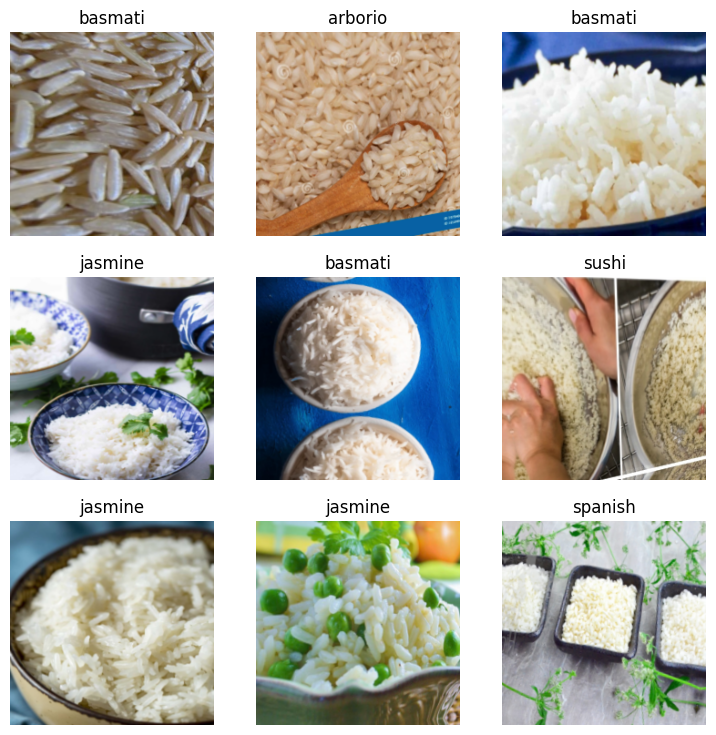

In [9]:
dls.show_batch()

In [10]:
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

trained_learn = load_learner('learn_fine_model.pkl')
trained_learn.dls = dls

pathlib.PosixPath = temp

In [15]:
trained_learn.predict('data\jasmine\\0a8eb172-fa46-4b27-95c7-49bfc353df87.jpg')

('jasmine',
 TensorBase(2),
 TensorBase([2.7244e-03, 1.8075e-03, 9.8209e-01, 1.7543e-04, 1.3205e-02]))

In [28]:
cleaner = widgets.ImageClassifierCleaner(trained_learn)
cleaner

c:\Users\Waylo\.virtualenvs\AI_env\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Waylo\.virtualenvs\AI_env\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


In [71]:
for each in cleaner.delete():
    cleaner.fns[each].unlink()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data\\sushi\\94bdf398-1df4-4bab-b90f-202976bea005.jpg'

In [72]:
for each, cat in cleaner.change():
    os.rename(cleaner.fns[each], Path(datapath/cat/cleaner.fns[each].name))

Type:        module
String form: <module 'fastai.vision' from 'c:\\Users\\Waylo\\.virtualenvs\\AI_env\\lib\\site-packages\\fastai\\vision\\__init__.py'>
File:        c:\users\waylo\.virtualenvs\ai_env\lib\site-packages\fastai\vision\__init__.py
Docstring:   <no docstring>
